# 7.2.4 ARIMA 모델

In [2]:
pip install statsmodels

<ipython-input-23-400a3ae39446>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/pytorch_ex/chap07/data/sales.csv',
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Wed, 21 May 2025   AIC                            411.302
Time:                        04:47:10   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

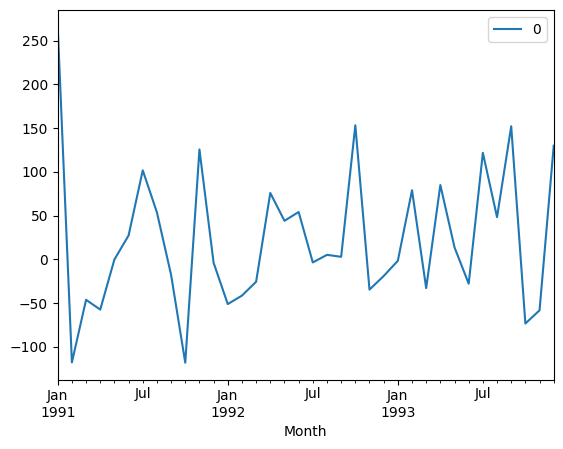

--------------------


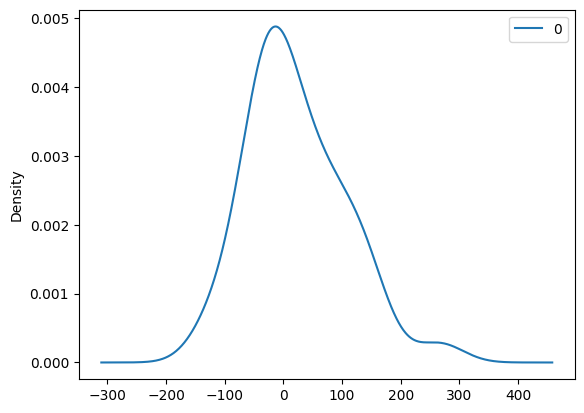

--------------------
                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [23]:
#ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측

#라이브러리 호출
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x) : #시간을 표현하는 함수 정의
  return datetime.strptime('199'+x, '%Y-%m') #strptime() : 날짜와 시간 정보를 문자열로 바꿔주는 메서드

series = read_csv('/content/drive/MyDrive/pytorch_ex/chap07/data/sales.csv',
                  header=0, parse_dates=[0], index_col=0, date_parser=parser) #자전거 매출에 대한 csv데이터 호출

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit() #디버그 정보 제공 기능 -> 비활성화(0)
print(model_fit.summary()) #모델에 대한 정보 표시
print('-'*20)
residuals = DataFrame(model_fit.resid)#모델에 대한 오차 정보를 Dataframe으로 residuals라는 변수로 저장
residuals.plot()
print('-'*20)
pyplot.show()
print('-'*20)
residuals.plot(kind='kde')
pyplot.show()
print('-'*20)
print(residuals.describe())

<ipython-input-26-77faabca5c38>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/pytorch_ex/chap07/data/sales.csv',


predicted=352.8553429916144, expected=[346.3]
predicted=277.3980357991226, expected=[329.7]
predicted=368.75373430395723, expected=[445.4]
predicted=331.77363461072997, expected=[325.9]
predicted=372.07040457406947, expected=[449.3]
predicted=360.02087234211905, expected=[411.3]
predicted=454.52622971783916, expected=[417.4]
predicted=388.69069911131027, expected=[545.5]
predicted=437.63244724754657, expected=[477.6]
predicted=516.4376238877605, expected=[687.]
predicted=520.9161904796415, expected=[435.3]
predicted=675.5946470948533, expected=[587.3]
predicted=505.20101582778835, expected=[676.9]
Test MSE(테스트 평균제곱오차) : 9118.818


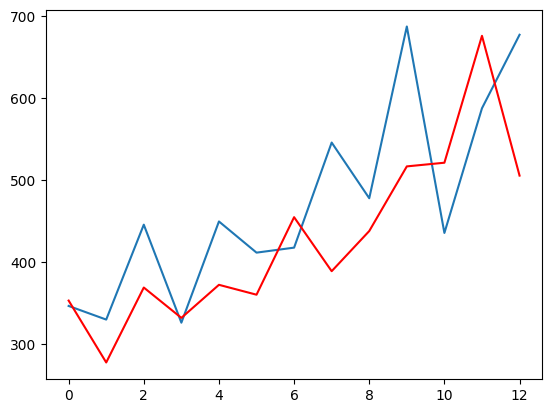

In [26]:
#statsmodels 라이브러리를 사용하여 sales 데이터셋 예측

import numpy as np
from datetime import datetime
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x) : #시간을 표현하는 함수 정의
  return datetime.strptime('199'+x, '%Y-%m') #strptime() : 날짜와 시간 정보를 문자열로 바꿔주는 메서드

series = read_csv('/content/drive/MyDrive/pytorch_ex/chap07/data/sales.csv',
                  header=0, parse_dates=[0], index_col=0, date_parser=parser) #자전거 매출에 대한 csv데이터 호출

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)] #train : test = 2:1로 분리
history = [x for x in train]
predictions = list()

for t in range(len(test)) : #테스트셋의 개수만큼 반복
  model = ARIMA(history, order=(5,1,0)) #ARIMA 함수 호출
  model_fit = model.fit() #훈련
  output = model_fit.forecast() #forecast() 매서드 사용하여 예측 수행
  yhat = output[0] #모델 출력 결과를 yhat에 저장
  predictions.append(yhat)
  obs = test[t] #해당 에포크를 인덱스로 가지는 테스트 데이터
  history.append(obs)
  print(f'predicted={yhat}, expected={obs}')
error = mean_squared_error(test, predictions)
print(f'Test MSE(테스트 평균제곱오차) : {error:.3f}')
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# 7.5 LSTM

**7.5.2 LSTM 셀 구현**

In [16]:
pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
#LSTM 셀 구현

#라이브러리 호출
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available() :
  torch.cuda.manual_seed_all(125)

In [2]:
#데이터 전처리

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize( (0.5,), (1.0,) ), #평균 0, 표준편자 1로 데이터 정규화
])

In [3]:
#데이터셋 내려받기

from torchvision.datasets import MNIST

download_root = '/content/drive/MyDrive/pytorch_ex/chap07/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
#train=True: 훈련용 세트 불러옴 / train=False: 테스트용 데이터세트 불러옴 / download=True: 내려받을 위치에 이미 파일 있으면 다운받지 않음

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 54.5MB/s]


Extracting /content/drive/MyDrive/pytorch_ex/chap07/MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/pytorch_ex/chap07/MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.43MB/s]


Extracting /content/drive/MyDrive/pytorch_ex/chap07/MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/pytorch_ex/chap07/MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.0MB/s]


Extracting /content/drive/MyDrive/pytorch_ex/chap07/MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/pytorch_ex/chap07/MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.68MB/s]

Extracting /content/drive/MyDrive/pytorch_ex/chap07/MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/pytorch_ex/chap07/MNIST_DATASET/MNIST/raw



In [4]:
#데이터셋을 메모리로 가져오기
batch_size = 64
train_loader = DataLoader( dataset=train_dataset, batch_size=batch_size, shuffle=True )
valid_loader = DataLoader( dataset=test_dataset, batch_size=batch_size, shuffle=True )
test_loader = DataLoader( dataset=test_dataset, batch_size=batch_size, shuffle=True )

In [5]:
#변수 값 지정

batch_size = 100
n_iters = 6000
num_epochs = n_iters / ( len(train_dataset)/batch_size )
num_epochs = int(num_epochs)

In [12]:
#LSTM 셀 네트워크 구축(게이트 위주)

class LSTMCell(nn.Module) :
  def __init__(self, input_size, hidden_size, bias=True) :
    super(LSTMCell, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.bias = bias
    self.x2h = nn.Linear(input_size, 4*hidden_size, bias=bias) #4개의 게이트로 쪼개질 것이기 때문에 4*_
    self.h2h = nn.Linear(hidden_size, 4*hidden_size, bias=bias)
    self.reset_parameters()

  def reset_parameters(self) :
    std = 1.0 / math.sqrt(self.hidden_size)
    for w in self.parameters() :
      w.data.uniform_(-std, std) #난수(범위 사이의 무작위 수) 생성

  def forward(self, x, hidden) :
    hx, cx = hidden
    x = x.view(-1, x.size(1))

    gates = self.x2h(x) + self.h2h(hx)
    gates = gates.squeeze() #텐서의 차원 줄임
    ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1) #총 게이트를 나타내는 텐서를 4개로 쪼갬

    #각 게이트에 시그모이드 활성화 함수 적용
    ingate = F.sigmoid(ingate)
    forgetgate = F.sigmoid(forgetgate)
    cellgate = F.sigmoid(cellgate)
    outgate = F.sigmoid(outgate)

    cy = torch.mul(cx, forgetgate) + torch.mul(ingate, cellgate) #셀 상태 (torch.mul(): 텐서 곱셈)
    hy = torch.mul(outgate, F.tanh(cy))

    return (hy, cy)

In [17]:
#LSTM 셀의 전반적인 네트워크

class LSTMModel(nn.Module) :
  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True) :
    super(LSTMModel, self).__init__()
    self.hidden_dim = hidden_dim

    self.layer_dim = layer_dim
    self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim) #입력 특성 수 / 은닉층의 뉴런 개수 / 은닉층 몇 개인지
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x) :
    #(은닉층 몇 개, 배치크기, 은닉층 뉴런 개수) 가지는 '은닉상태'를 0으로 초기화
    if torch.cuda.is_available() :
      h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
    else :
      h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

    #(은닉층 몇 개, 배치크기, 은닉층 뉴런 개수) 가지는 '셀 상태'를 0으로 초기화
    if torch.cuda.is_available() :
      c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
    else :
      c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

    outs = []
    hn = h0[0,:,:] #(은닉층 몇 개, 배치크기, 은닉층 뉴런 개수) 가지는 '은닉 상태' 텐서
    cn = c0[0,:,:] #(은닉층 몇 개, 배치크기, 은닉층 뉴런 개수) 가지는 '셀 상태' 텐서

    for seq in range(x.size(1)) : #LSTM 셀 계층 쌓아올림
      hn, cn = self.lstm(x[:,seq,:] , (hn, cn)) #은닉상태와 셀상태를 LSTMCell에 적용한 결과 -> 다시 hn, cn에 저장
      outs.append(hn)

    out = outs[-1].squeeze()
    out = self.fc(out)

    return out

In [18]:
#옵티마이저, 손실 함수 지정

input_dim = 28
hidden_dim = 128
layer_dim = 1
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
if torch.cuda.is_available() :
  model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
#모델 학습 및 성능 확인
seq_dim = 28
loss_list = []
iter = 0
for epoch in range(num_epochs) :

  for i, (images, labels) in enumerate(train_loader) : #훈련 데이터셋 이용한 모델 학습
    if torch.cuda.is_available() :
      images = Variable(images.view(-1, seq_dim, input_dim).cuda())
      labels = Variable(labels.cuda())
    else :
      images = Variable(images.view(-1, seq_dim, input_dim))
      labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels) #손실 함수 이용하여 오차 계산

    if torch.cuda.is_available() :
      loss.cuda()

    loss.backward() #역전파
    optimizer.step() #파라미터 업데이트
    loss_list.append(loss.item()) #손실 누적
    iter += 1

    if iter % 500 == 0 :
      correct = 0
      total = 0
      for images, labels in valid_loader :

        if torch.cuda.is_available() :
          images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else :
          images = Variable(images.view(-1, seq_dim, input_dim))

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) #모델을 통과한 결과의 최댓값으로부터 예측 결과 가져오기

        total += labels.size(0)
        if torch.cuda.is_available() :
          correct += (predicted.cpu() == labels.cpu()).sum()
        else :
          correct += (predicted == labels).sum()

      accuracy = 100 * correct / total
      print(f'Iteration: {iter}. Loss: {loss.item()}. Accuracy: {accuracy}')

Iteration: 500. Loss: 2.304553270339966. Accuracy: 9.739999771118164
Iteration: 1000. Loss: 2.313316822052002. Accuracy: 11.350000381469727
Iteration: 1500. Loss: 2.287043333053589. Accuracy: 11.369999885559082
Iteration: 2000. Loss: 2.2835850715637207. Accuracy: 15.369999885559082
Iteration: 2500. Loss: 2.279179573059082. Accuracy: 16.889999389648438
Iteration: 3000. Loss: 2.251875400543213. Accuracy: 22.6299991607666
Iteration: 3500. Loss: 1.9471125602722168. Accuracy: 31.600000381469727
Iteration: 4000. Loss: 1.463100790977478. Accuracy: 46.34000015258789
Iteration: 4500. Loss: 0.9729139804840088. Accuracy: 60.540000915527344
Iteration: 5000. Loss: 0.8405259847640991. Accuracy: 72.44999694824219
Iteration: 5500. Loss: 0.6660410165786743. Accuracy: 75.11000061035156
Iteration: 6000. Loss: 0.4970030188560486. Accuracy: 81.45999908447266
Iteration: 6500. Loss: 0.37289026379585266. Accuracy: 85.58000183105469
Iteration: 7000. Loss: 0.29965177178382874. Accuracy: 87.66999816894531
Iterat

In [20]:
#테스트 데이터셋을 이용한 모델 예측 성능 확인

def evaluate(model, val_iter) :
  corrects, total, total_loss = 0, 0, 0
  model.eval()
  for images, labels in val_iter :
    if torch.cuda.is_available() :
      images = Variable(images.view(-1, seq_dim, input_dim).cuda())
    else :
      images = Variable(images.view(-1, seq_dim, input_dim).to(device))

    logit = model(images).to(device)
    loss = F.cross_entropy(logit, labels, reduction='sum') #reduction='sum': 모든 오차 적용
    _, predicted = torch.max(logit.data, 1) #logit.data텐서에서 최댓값의 인덱스 반환
    total += labels.size(0)
    total_loss += loss.item()
    corrects += (predicted == labels).sum()

  avg_loss = total_loss / len(val_iter.dataset)
  avg_accuracy = corrects / total

  return avg_loss, avg_accuracy

In [21]:
#모델 예측 성능 확인

test_loss, test_acc = evaluate(model, test_loader)
print(f'Test Loss: {test_loss:5.2f} | Test Accuracy: {test_acc:5.2f}')

Test Loss:  0.23 | Test Accuracy:  0.93


**7.5.3 LSTM 계층 구현**

In [23]:
#스타벅스 주가 데이터셋 -> 모델이 얼마나 주가 예측을 잘 하는지

#라이브러리 호출
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [24]:
#데이터셋 가져오기

data = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap07/data/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [27]:
#날짜 칼럼을 인덱스로 사용

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True) #date 칼럼을 인덱스로 사용

In [29]:
#데이터 형식을 실수로 변경
data['Volume'] = data['Volume'].astype(float)

In [30]:
#훈련과 레이블 분리

x = data.iloc[:, :-1]
y = data.iloc[:, 5:6]
print(x)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [31]:
#데이터 분포 조정(정규화)

ss = StandardScaler() #평균0, 분산1 되게 조정
ms = MinMaxScaler() #데이터의 모든 값이 0~1 사이에 존재하게 조정

x_ss = ss.fit_transform(x)
y_ms = ms.fit_transform(y)

x_train = x_ss[:200, :]
x_test = x_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

print('training shape', x_train.shape, y_train.shape)
print('testing shape', x_test.shape, y_test.shape)

training shape (200, 5) (200, 1)
testing shape (53, 5) (53, 1)


In [33]:
#데이터셋 형태 및 크기 조정
x_train_tensors = Variable(torch.Tensor(x_train)) #Variable로 감싸진 텐서는 backward()가 호출 될 때 자동 기울기 계산
x_test_tensors = Variable(torch.Tensor(x_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

                    #훈련 데이터셋 형태 (200, 5) -> (200, 1, 5) : LSTM 신경망의 입력 형태와 맞춤
x_train_tensors_f = torch.reshape( x_train_tensors, (x_train_tensors.shape[0], 1, x_train_tensors.shape[1]) )
x_test_tensors_f = torch.reshape( x_test_tensors, (x_test_tensors.shape[0], 1, x_test_tensors.shape[1]) )

print('training shape', x_train_tensors_f.shape, y_train_tensors.shape)
print('testing shape', x_test_tensors_f.shape, y_test_tensors.shape)

training shape torch.Size([200, 1, 5]) torch.Size([200, 1])
testing shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [34]:
#LSTM 네트워크

class LSTM(nn.Module) :

  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) :
    super(LSTM, self).__init__()
    self.num_classes = num_classes #출력 클래스 개수
    self.num_layers = num_layers #LSTM 계층 개수
    self.input_size = input_size #입력 크기. 훈련 데이터셋의 칼럼 개수
    self.hidden_size = hidden_size #은닉층 뉴런 개수
    self.seq_length = seq_length #시퀀스의 길이

    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
    self.fc_1 = nn.Linear(hidden_size, 128)
    self.fc = nn.Linear(128, num_classes)
    self.relu = nn.ReLU()

  def forward(self, x) :
    h_0 = Variable( torch.zeros(self.num_layers, x.size(0), self.hidden_size) ) #은닉 상태를 0으로 초기화
    c_0 = Variable( torch.zeros(self.num_layers, x.size(0), self.hidden_size) ) #셀 상태를 0으로 초기화
    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #LSTM 계층에 은닉상태, 셀상태 적용
    hn = hn.view(-1, self.hidden_size) #완전연결층 적용 위해 1차원으로 조정
    out = self.relu(hn) #활성화
    out = self.fc_1(out) #완전연결층 1
    out = self.relu(out) #활성화
    out = self.fc(out)
    return out

In [35]:
#변수값 설정
num_epochs = 1000   #에포크 횟수
learning_rate = 0.0001   #학습률

input_size = 5   #입력 데이터셋의 칼럼 수
hidden_size = 2   #은닉층의 뉴런 개수
num_layers = 1   #LSTM 계층의 개수

num_classes = 1   #출력 클래스 개수
model = LSTM(num_classes, input_size, hidden_size, num_layers, x_train_tensors_f.shape[1]) #LSTM 모델 학습

criterion = torch.nn.MSELoss()   #평균제곱오차
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)   #아담 옵티마이저, 학습률

In [38]:
#모델 학습

for epoch in range(num_epochs) :
  outputs = model.forward(x_train_tensors_f) #순전파
  optimizer.zero_grad() #0으로 초기화
  loss = criterion(outputs, y_train_tensors) #손실함수로 오차 계산
  loss.backward() #기울기 계산

  optimizer.step() #오차로 파라미터 업데이트
  if epoch % 100 == 0 :
    print(f'Epoch: {epoch}, loss:{loss.item():1.5f}')

Epoch: 0, loss:0.05825
Epoch: 100, loss:0.03354
Epoch: 200, loss:0.02936
Epoch: 300, loss:0.02614
Epoch: 400, loss:0.02380
Epoch: 500, loss:0.02203
Epoch: 600, loss:0.02071
Epoch: 700, loss:0.01971
Epoch: 800, loss:0.01899
Epoch: 900, loss:0.01850


In [43]:
#모델 예측 결과를 그래프로 출력하기 위하여, 데이터 크기 재구성

df_x_ss = ss.transform(data.iloc[:, :-1]) #데이터 정규화 (모든 값 0~1 분포 조정)
df_y_ms = ms.transform(data.iloc[:, -1:]) #정규화 (평균0 분산1)

df_x_ss = Variable(torch.Tensor(df_x_ss)) #텐서로 변경
df_y_ms = Variable(torch.Tensor(df_y_ms)) #텐서로 변경
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) #데이터 크기 변경 (_, 1, _)

In [ ]:
#모델 예측 결과 그래프로 출력
train_predict = model(df_x_ss) #훈련 데이터셋 적용하여 모델 훈련
predicted = train_predict.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y